In [10]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

In [12]:
y = np.array(iris.target)
X = np.array(iris.data)
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


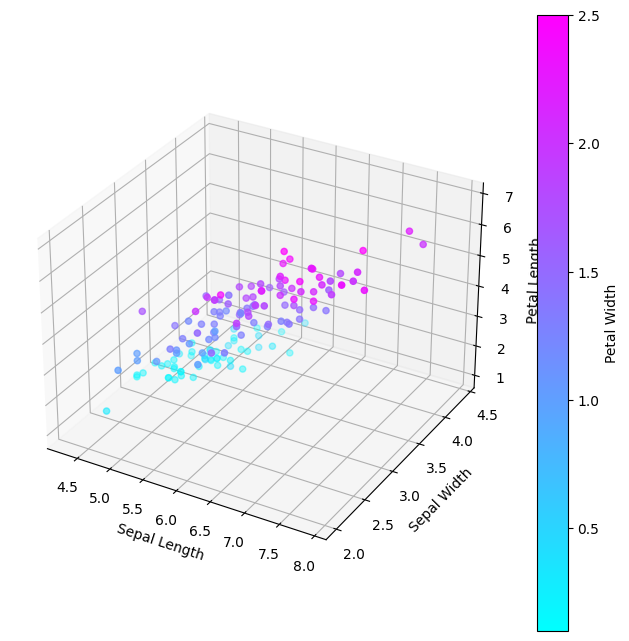

In [13]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 3], cmap=plt.cm.cool)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
fig.colorbar(img, label='Petal Width')
plt.show()

In [14]:
def building_dict(X, y):
    dict = {}
    for pts, label in zip(X, y):
        if label in dict:
            dict[label].append(pts)
        else:
            dict[label] = [pts]
    return dict

In [15]:
def K_Nearest_Neighbor(data,target_value,K):
    distance = []
    for label in data:
      for pts in data[label]:
        distance.append([np.linalg.norm(pts-target_value),label])
    distance = sorted(distance, key=lambda x: x[0])[:K]
    print(distance)
    label_count = {0: 0, 1: 0, 2: 0}
    for i in distance:
        label_count[i[1]] += 1
    return max(label_count, key=label_count.get)

In [16]:
def K_Nearest_Neighbor(data,target_value,K):
    distance = []
    for label in data:
        for pts in data[label]:
            distance.append([np.linalg.norm(pts - target_value), label])
    distance = sorted(distance, key=lambda x: x[0])[:K]
    label_count = {label: 0 for label in data.keys()}
    for dist, label in distance:
        label_count[label] += 1
    return max(label_count, key=label_count.get)

In [17]:
res = K_Nearest_Neighbor(building_dict(X,y),[6.7,3.3,5.7,2.5],3)
print("Predicted :",end=" ")
if(res == 0):
  print("Setosa")
elif(res == 1):
  print("Versicolor")
else:
  print("Virginica")

Predicted : Virginica
